In [1]:
# ! pip install currency_converter
# imports
from currency_converter import CurrencyConverter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import date

# read file
data = pd.read_csv("cleanedsamsungtesting.csv")
#print(data)

In [ ]:
!pip install CurrencyConverter

In [ ]:
# Visualisation for both selected year and month
#conversion at the end

#convert  date data to datetime format
theDates =  pd.to_datetime(data['date'], format='%m/%d/%Y')

#data for selected year
a = input("input year: ")
cdates = []
copen = []
chigh = []
clow = []
cclose = []
cadj_close = []
cvolume = []
cstockname = []
cdf = pd.DataFrame()

#print(data.open)

for i in range(len(theDates)):
    if int(a) == int(theDates[i].year):
        cdates.append(theDates[i])
        copen.append(data.open[i])
        chigh.append(data.high[i])
        clow.append(data.low[i])
        cclose.append(data.close[i])
        cadj_close.append(data.adj_close[i])
        cvolume.append(data.volume[i])
        cstockname.append(data.Stockname[i])

cdf.insert(0, 'date', cdates, True)
cdf.insert(1, 'open', copen, True)
cdf.insert(2, 'high', chigh, True)
cdf.insert(3, 'low', clow, True)
cdf.insert(4, 'close', cclose, True)
cdf.insert(5, 'adj_close', cadj_close, True)
cdf.insert(6, 'volume', cvolume, True)
cdf.insert(7, 'Stockname', cstockname, True)
        
#print(cdf)

#data for selected month
b = int(input("input month (1-12): "))
mdates = []
mopen = []
mhigh = []
mlow = []
mclose = []
madj_close = []
mvolume = []
mstockname = []
mdf = pd.DataFrame()
for i in range(len(cdf.date)):
    if int(b) == int(cdf.date[i].month):
        mdates.append(cdf.date[i])
        mopen.append(cdf.open[i])
        mhigh.append(cdf.high[i])
        mlow.append(cdf.low[i])
        mclose.append(cdf.close[i])
        madj_close.append(cdf.adj_close[i])
        mvolume.append(cdf.volume[i])
        mstockname.append(cdf.Stockname[i])
mdf.insert(0, 'date', mdates, True)
mdf.insert(1, 'open', mopen, True)
mdf.insert(2, 'high', mhigh, True)
mdf.insert(3, 'low', mlow, True)
mdf.insert(4, 'close', mclose, True)
mdf.insert(5, 'adj_close', madj_close, True)
mdf.insert(6, 'volume', mvolume, True)
mdf.insert(7, 'Stockname', mstockname, True)


#convert to usd
def convert(amount):
    c = CurrencyConverter()
    value = c.convert(amount, "KRW", "USD")
    return value
    
convertopenarr = []
converthigharr = []
convertlowarr = []
convertclosearr = []
convertadjclosearr = []
    
for i in range(len(mdf.open)):
    convertopen = float(convert(mdf.open[i]))
    convertopenarr.append(convertopen)
    converthigh = float(convert(mdf.high[i]))
    converthigharr.append(converthigh)
    convertlow = float(convert(mdf.low[i]))
    convertlowarr.append(convertlow)
    convertclose = float(convert(mdf.close[i]))
    convertclosearr.append(convertclose)
    convertadjclose = float(convert(mdf.adj_close[i]))
    convertadjclosearr.append(convertadjclose)
mdf.insert(8, 'Open_USD', convertopenarr, True)
mdf.insert(9, 'High_USD', converthigharr, True)
mdf.insert(10, 'Low_USD', convertlowarr, True)
mdf.insert(11, 'Close_USD', convertclosearr, True)
mdf.insert(12, 'Adj_Close_USD', convertadjclosearr, True)

print(mdf)

#print(mdf)
mdates = pd.to_datetime(mdf['date'], format='%Y/%m/%d')
x = []
for dates in mdates:
    if int(dates.month) == b:
        x.append(dates.day)

        
#x = mdf.date
y_adjclose = mdf.Adj_Close_USD
y_high = mdf.High_USD
y_low = mdf.Low_USD

fig = plt.figure(figsize=(15,7))
title = fig.suptitle('Stock trend in {}/{}.'.format(b , a), fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Adj Close")
ax1.set_xlabel('Dates') 
ax1.set_ylabel('Amount (USD)')
ax1.plot(x,y_adjclose, label="Adj Close")

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("High and Low")
ax2.set_xlabel('Dates') 
ax2.set_ylabel('Amount (USD)')
ax2.plot(x,y_high, label="High")
ax2.plot(x,y_low, label="Low")

ax1.legend()
ax2.legend()
plt.show()
#plt.subplot(211)
#plt.plot(x,y_adjclose, label="Adj Close")
#plt.subplot(212)
#plt.plot(x,y_high, label="High")
#plt.subplot(213)
#plt.plot(x,y_low, label="Low")
#plt.xlabel('Dates') 
#plt.ylabel('Adj Close (USD)') 
#plt.title('Stock trend in {}/{}.'.format(b , a))


#plt.subplots(figsize=(15, 10))
#plt.xlim(1,30)




 

           date     open     high      low    close     adj_close      volume  \
0    2015-04-09  29400.0  29780.0  29400.0  29660.0    287.633209   9107550.0   
1    2015-04-10  29600.0  29880.0  29560.0  29800.0    288.990875   9960100.0   
2    2015-04-13  29580.0  29820.0  29360.0  29580.0    286.857361  10293300.0   
3    2015-04-14  29700.0  29700.0  29300.0  29480.0    285.887604   9429750.0   
4    2015-04-15  29200.0  29400.0  28540.0  28920.0    280.456970  13551050.0   
...         ...      ...      ...      ...      ...           ...         ...   
1107 2019-10-22  50800.0  51500.0  50700.0  51200.0  51200.000000  10898729.0   
1108 2019-10-23  51300.0  51500.0  50800.0  51200.0  51200.000000   8663880.0   
1109 2019-10-24  52500.0  52500.0  50500.0  50700.0  50700.000000  21185785.0   
1110 2019-10-25  50800.0  51200.0  50500.0  50900.0  50900.000000   7879897.0   
1111 2019-10-28  50700.0  51500.0  50700.0  51300.0  51300.000000   6431522.0   

             Stockname   Op

C:\Users\olivi\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


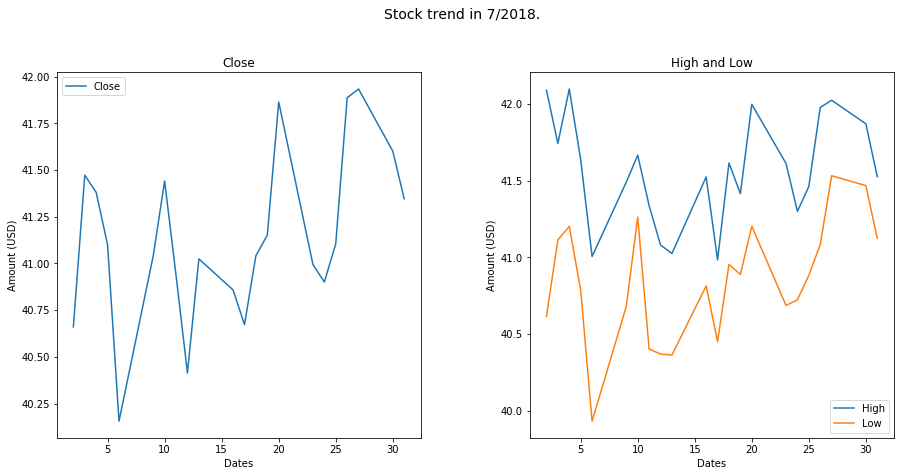

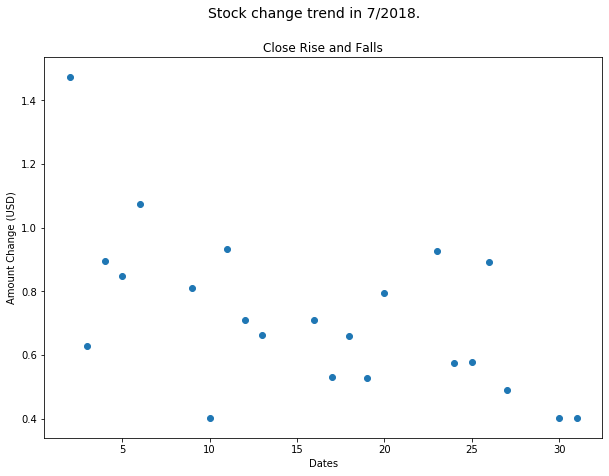

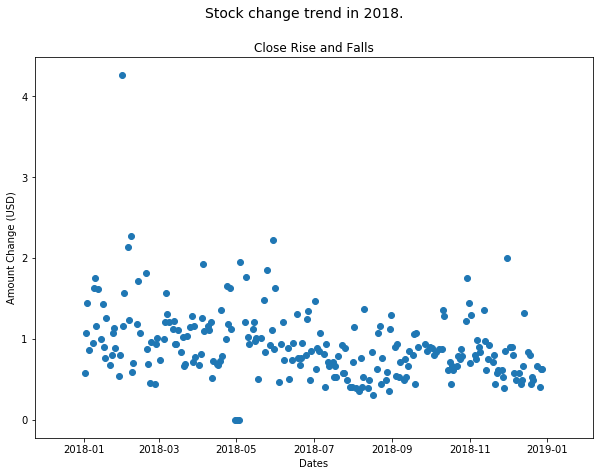

In [5]:
# Visualisation for both selected year and month
#conversion at the start

#convert  date data to datetime format
theDates =  pd.to_datetime(data['date'], format='%m/%d/%Y')



#convert KRW to USD
c = CurrencyConverter('http://www.ecb.int/stats/eurofxref/eurofxref-hist.zip', fallback_on_missing_rate=True)
def convert(amount, dateyear, datemonth, dateday):
#     value = amount
    value = c.convert(amount, "KRW", "USD", date=date(dateyear, datemonth, dateday))
    
    return value

convertopenarrStart = []
converthigharrStart = []
convertlowarrStart = []
convertclosearrStart = []
convertadjclosearrStart = []
ndates = []
nopen = []
nhigh = []
nlow = []
nclose = []
nadj_close = []
nvolume = []
nstockname = []
ndf = pd.DataFrame()
    
for i in range(len(data.open)):
    ndates.append(theDates[i])
    nopen.append(data.open[i])
    nhigh.append(data.high[i])
    nlow.append(data.low[i])
    nclose.append(data.close[i])
    nadj_close.append(data.adj_close[i])
    nvolume.append(data.volume[i])
    nstockname.append(data.Stockname[i])
    convertopen1 = float(convert(data.open[i], theDates[i].year, theDates[i].month, theDates[i].day))
    convertopenarrStart.append(convertopen1)
    converthigh1 = float(convert(data.high[i], theDates[i].year, theDates[i].month, theDates[i].day))
    converthigharrStart.append(converthigh1)
    convertlow1 = float(convert(data.low[i], theDates[i].year, theDates[i].month, theDates[i].day))
    convertlowarrStart.append(convertlow1)
    convertclose1 = float(convert(data.close[i], theDates[i].year, theDates[i].month, theDates[i].day))
    convertclosearrStart.append(convertclose1)
    convertadjclose1 = float(convert(data.adj_close[i], theDates[i].year, theDates[i].month, theDates[i].day))
    convertadjclosearrStart.append(convertadjclose1)
    
ndf.insert(0, 'date', ndates, True)
ndf.insert(1, 'open', nopen, True)
ndf.insert(2, 'high', nhigh, True)
ndf.insert(3, 'low', nlow, True)
ndf.insert(4, 'close', nclose, True)
ndf.insert(5, 'adj_close', nadj_close, True)
ndf.insert(6, 'volume', nvolume, True)
ndf.insert(7, 'Stockname', nstockname, True)
ndf.insert(8, 'Open_USD', convertopenarrStart, True)
ndf.insert(9, 'High_USD', converthigharrStart, True)
ndf.insert(10, 'Low_USD', convertlowarrStart, True)
ndf.insert(11, 'Close_USD', convertclosearrStart, True)
ndf.insert(12, 'Adj_Close_USD', convertadjclosearrStart, True)

print(ndf)


#data for selected year
a = input("input year: ")
cdates = []
copen = []
chigh = []
clow = []
cclose = []
cadj_close = []
cvolume = []
cstockname = []
copenusd = []
chighusd = []
clowusd = []
ccloseusd = []
cadjcloseusd = []
cdf = pd.DataFrame()

#print(data.open)

for i in range(len(theDates)):
    if int(a) == int(theDates[i].year):
        cdates.append(theDates[i])
        copen.append(ndf.open[i])
        chigh.append(ndf.high[i])
        clow.append(ndf.low[i])
        cclose.append(ndf.close[i])
        cadj_close.append(ndf.adj_close[i])
        cvolume.append(ndf.volume[i])
        cstockname.append(ndf.Stockname[i])
        copenusd.append(ndf.Open_USD[i])
        chighusd.append(ndf.High_USD[i])
        clowusd.append(ndf.Low_USD[i])
        ccloseusd.append(ndf.Close_USD[i])
        cadjcloseusd.append(ndf.Adj_Close_USD[i])
        

cdf.insert(0, 'date', cdates, True)
cdf.insert(1, 'open', copen, True)
cdf.insert(2, 'high', chigh, True)
cdf.insert(3, 'low', clow, True)
cdf.insert(4, 'close', cclose, True)
cdf.insert(5, 'adj_close', cadj_close, True)
cdf.insert(6, 'volume', cvolume, True)
cdf.insert(7, 'Stockname', cstockname, True)
cdf.insert(8, 'Open_USD', copenusd, True)
cdf.insert(9, 'High_USD', chighusd, True)
cdf.insert(10, 'Low_USD', clowusd, True)
cdf.insert(11, 'Close_USD', ccloseusd, True)
cdf.insert(12, 'Adj_Close_USD', cadjcloseusd, True)

        
#print(cdf)

#data for selected month
b = int(input("input month (1-12): "))
mdates = []
mopen = []
mhigh = []
mlow = []
mclose = []
madj_close = []
mvolume = []
mstockname = []
mopenusd = []
mhighusd = []
mlowusd = []
mcloseusd = []
madjcloseusd = []
mdf = pd.DataFrame()
for i in range(len(cdf.date)):
    if int(b) == int(cdf.date[i].month):
        mdates.append(cdf.date[i])
        mopen.append(cdf.open[i])
        mhigh.append(cdf.high[i])
        mlow.append(cdf.low[i])
        mclose.append(cdf.close[i])
        madj_close.append(cdf.adj_close[i])
        mvolume.append(cdf.volume[i])
        mstockname.append(cdf.Stockname[i])
        mopenusd.append(cdf.Open_USD[i])
        mhighusd.append(cdf.High_USD[i])
        mlowusd.append(cdf.Low_USD[i])
        mcloseusd.append(cdf.Close_USD[i])
        madjcloseusd.append(cdf.Adj_Close_USD[i])
        
mdf.insert(0, 'date', mdates, True)
mdf.insert(1, 'open', mopen, True)
mdf.insert(2, 'high', mhigh, True)
mdf.insert(3, 'low', mlow, True)
mdf.insert(4, 'close', mclose, True)
mdf.insert(5, 'adj_close', madj_close, True)
mdf.insert(6, 'volume', mvolume, True)
mdf.insert(7, 'Stockname', mstockname, True)
mdf.insert(8, 'Open_USD', mopenusd, True)
mdf.insert(9, 'High_USD', mhighusd, True)
mdf.insert(10, 'Low_USD', mlowusd, True)
mdf.insert(11, 'Close_USD', mcloseusd, True)
mdf.insert(12, 'Adj_Close_USD', madjcloseusd, True)



print(mdf)


#print(mdf)
mdates = pd.to_datetime(mdf['date'], format='%Y/%m/%d')
x = []
for dates in mdates:
    if int(dates.month) == b:
        x.append(dates.day)

        
#x = mdf.date
y_close = mdf.Close_USD
y_high = mdf.High_USD
y_low = mdf.Low_USD
fig = plt.figure(figsize=(15,7))
title = fig.suptitle('Stock trend in {}/{}.'.format(b , a), fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Close")
ax1.set_xlabel('Dates') 
ax1.set_ylabel('Amount (USD)')
ax1.plot(x,y_close, label="Close")
#ax1.scatter(x,y_close, label="Close")
ax2 = fig.add_subplot(1,2,2)
ax2.set_title("High and Low")
ax2.set_xlabel('Dates') 
ax2.set_ylabel('Amount (USD)')
ax2.plot(x,y_high, label="High")
ax2.plot(x,y_low, label="Low")
#ax2.scatter(x,y_high, label="High")
#ax2.scatter(x,y_low, label="Low")

#plt.subplot(211)
#plt.plot(x,y_adjclose, label="Adj Close")
#plt.subplot(212)
#plt.plot(x,y_high, label="High")
#plt.subplot(213)
#plt.plot(x,y_low, label="Low")
#plt.xlabel('Dates') 
#plt.ylabel('Adj Close (USD)') 
#plt.title('Stock trend in {}/{}.'.format(b , a))


#plt.subplots(figsize=(15, 10))
#plt.xlim(1,30)

#test second plot - scatterplot difference
difference = y_high - y_low
fig2 = plt.figure(figsize=(10,7))
title = fig2.suptitle('Stock change trend in {}/{}.'.format(b , a), fontsize=14)
ax = fig2.add_subplot(1,1,1)
ax.set_title("Close Rise and Falls")
ax.set_xlabel('Dates') 
ax.set_ylabel('Amount Change (USD)')
ax.scatter(x,difference, label="Difference")



#third scatterplot
y_highh = cdf.High_USD
y_loww = cdf.Low_USD
mmdates = pd.to_datetime(cdf['date'], format='%Y/%m/%d')
x1 = []
for dates in mmdates:
    if int(dates.year) == int(a):
        x1.append(dates)
        
print(mmdates)
print(x1)
        
difference1 = y_highh - y_loww
fig3 = plt.figure(figsize=(10,7))
title = fig3.suptitle('Stock change trend in {}.'.format(a), fontsize=14)
axx = fig3.add_subplot(1,1,1)
axx.set_title("Close Rise and Falls")
axx.set_xlabel('Dates') 
axx.set_ylabel('Amount Change (USD)')
axx.scatter(x1,difference1, label="Difference")
ax1.legend()
ax2.legend()
plt.show()



    

In [ ]:
print(type(dates.year))
print(type(a))

In [ ]:
# Visualisation for both selected year (display months)

#convert  date data to datetime format
theDates =  pd.to_datetime(data['date'], format='%m/%d/%Y')
#convert KRW to USD
c = CurrencyConverter()
def convert(amount):
    value = c.convert(amount, "KRW", "USD")
    return value
convertopenarrStart = []
converthigharrStart = []
convertlowarrStart = []
convertclosearrStart = []
convertadjclosearrStart = []
ndates = []
nopen = []
nhigh = []
nlow = []
nclose = []
nadj_close = []
nvolume = []
nstockname = []
ndf = pd.DataFrame()
    
for i in range(len(data.open)):
    ndates.append(theDates[i])
    nopen.append(data.open[i])
    nhigh.append(data.high[i])
    nlow.append(data.low[i])
    nclose.append(data.close[i])
    nadj_close.append(data.adj_close[i])
    nvolume.append(data.volume[i])
    nstockname.append(data.Stockname[i])
    convertopen1 = float(convert(data.open[i]))
    convertopenarrStart.append(convertopen1)
    converthigh1 = float(convert(data.high[i]))
    converthigharrStart.append(converthigh1)
    convertlow1 = float(convert(data.low[i]))
    convertlowarrStart.append(convertlow1)
    convertclose1 = float(convert(data.close[i]))
    convertclosearrStart.append(convertclose1)
    convertadjclose1 = float(convert(data.adj_close[i]))
    convertadjclosearrStart.append(convertadjclose1)
    
ndf.insert(0, 'date', ndates, True)
ndf.insert(1, 'open', nopen, True)
ndf.insert(2, 'high', nhigh, True)
ndf.insert(3, 'low', nlow, True)
ndf.insert(4, 'close', nclose, True)
ndf.insert(5, 'adj_close', nadj_close, True)
ndf.insert(6, 'volume', nvolume, True)
ndf.insert(7, 'Stockname', nstockname, True)
ndf.insert(8, 'Open_USD', convertopenarrStart, True)
ndf.insert(9, 'High_USD', converthigharrStart, True)
ndf.insert(10, 'Low_USD', convertlowarrStart, True)
ndf.insert(11, 'Close_USD', convertclosearrStart, True)
ndf.insert(12, 'Adj_Close_USD', convertadjclosearrStart, True)

#print(ndf)


#data for selected year
a = input("input year: ")
cdates = []
copen = []
chigh = []
clow = []
cclose = []
cadj_close = []
cvolume = []
cstockname = []
copenusd = []
chighusd = []
clowusd = []
ccloseusd = []
cadjcloseusd = []
cdf = pd.DataFrame()

#print(data.open)

for i in range(len(theDates)):
    if int(a) == int(theDates[i].year):
        cdates.append(theDates[i])
        copen.append(ndf.open[i])
        chigh.append(ndf.high[i])
        clow.append(ndf.low[i])
        cclose.append(ndf.close[i])
        cadj_close.append(ndf.adj_close[i])
        cvolume.append(ndf.volume[i])
        cstockname.append(ndf.Stockname[i])
        copenusd.append(ndf.Open_USD[i])
        chighusd.append(ndf.High_USD[i])
        clowusd.append(ndf.Low_USD[i])
        ccloseusd.append(ndf.Close_USD[i])
        cadjcloseusd.append(ndf.Adj_Close_USD[i])
        

cdf.insert(0, 'date', cdates, True)
cdf.insert(1, 'open', copen, True)
cdf.insert(2, 'high', chigh, True)
cdf.insert(3, 'low', clow, True)
cdf.insert(4, 'close', cclose, True)
cdf.insert(5, 'adj_close', cadj_close, True)
cdf.insert(6, 'volume', cvolume, True)
cdf.insert(7, 'Stockname', cstockname, True)
cdf.insert(8, 'Open_USD', copenusd, True)
cdf.insert(9, 'High_USD', chighusd, True)
cdf.insert(10, 'Low_USD', clowusd, True)
cdf.insert(11, 'Close_USD', ccloseusd, True)
cdf.insert(12, 'Adj_Close_USD', cadjcloseusd, True)

        
#print(cdf)


#print(mdf)
mdates = pd.to_datetime(cdf['date'], format='%Y/%m/%d')
x = []
for dates in mdates:
    if int(dates.year) == int(a):
        x.append(dates.month)

y_close = cdf.Close_USD
y_high = cdf.High_USD
y_low = cdf.Low_USD

fig = plt.figure(figsize=(15,7))
title = fig.suptitle('Stock trend in {}.'.format(a), fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Close")
ax1.set_xlabel('Dates') 
ax1.set_ylabel('Amount (USD)')
ax1.plot(x,y_close, label="Close")

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("High and Low")
ax2.set_xlabel('Dates') 
ax2.set_ylabel('Amount (USD)')
ax2.plot(x,y_high, label="High")
ax2.plot(x,y_low, label="Low")


ax1.legend()
ax2.legend()
plt.show()


In [ ]:
# test function

# Visualisation for both selected year and month
#conversion at the start

#convert  date data to datetime format
theDates =  pd.to_datetime(data['date'], format='%m/%d/%Y')

#convert KRW to USD
def convert(amount):
    c = CurrencyConverter()
    value = c.convert(amount, "KRW", "USD")
    return value

convertopenarrStart = []
converthigharrStart = []
convertlowarrStart = []
convertclosearrStart = []
convertadjclosearrStart = []
ndates = []
nopen = []
nhigh = []
nlow = []
nclose = []
nadj_close = []
nvolume = []
nstockname = []
ndf = pd.DataFrame()
    
for i in range(len(data.open)):
    ndates.append(theDates[i])
    nopen.append(data.open[i])
    nhigh.append(data.high[i])
    nlow.append(data.low[i])
    nclose.append(data.close[i])
    nadj_close.append(data.adj_close[i])
    nvolume.append(data.volume[i])
    nstockname.append(data.Stockname[i])
    convertopen1 = float(convert(data.open[i]))
    convertopenarrStart.append(convertopen1)
    converthigh1 = float(convert(data.high[i]))
    converthigharrStart.append(converthigh1)
    convertlow1 = float(convert(data.low[i]))
    convertlowarrStart.append(convertlow1)
    convertclose1 = float(convert(data.close[i]))
    convertclosearrStart.append(convertclose1)
    convertadjclose1 = float(convert(data.adj_close[i]))
    convertadjclosearrStart.append(convertadjclose1)
    
ndf.insert(0, 'date', ndates, True)
ndf.insert(1, 'open', nopen, True)
ndf.insert(2, 'high', nhigh, True)
ndf.insert(3, 'low', nlow, True)
ndf.insert(4, 'close', nclose, True)
ndf.insert(5, 'adj_close', nadj_close, True)
ndf.insert(6, 'volume', nvolume, True)
ndf.insert(7, 'Stockname', nstockname, True)
ndf.insert(8, 'Open_USD', convertopenarrStart, True)
ndf.insert(9, 'High_USD', converthigharrStart, True)
ndf.insert(10, 'Low_USD', convertlowarrStart, True)
ndf.insert(11, 'Close_USD', convertclosearrStart, True)
ndf.insert(12, 'Adj_Close_USD', convertadjclosearrStart, True)

a = input("input year: ")

def shortlist(inputtime, timeperiod, arraydate,arrayopen,arrayhigh, arraylow, arrayclose, arrayadjclose,arrayvolume,arraystockname, arrayopenusd, arrayhighusd, arraylowusd, arraycloseusd, arrayadjcloseusd, newdf, columndate, columnopen, columnhigh, columnlow, columnclose, columnadjclose, columnvolume, columnstockname, columnopenusd, columnhighusd, columnlowusd, columncloseusd, columnadjcloseusd):
    arraydate = []
    arrayopen = []
    arrayhigh = []
    arraylow = []
    arrayclose = []
    arrayadjclose = []
    arrayvolume = []
    arraystockname = []
    arrayopenusd = []
    arrayhighusd = []
    arraylowusd = []
    arraycloseusd = []
    arrayadjcloseusd = []
    newdf = pd.DataFrame()
    for i in range(len(columndate)):
        if int(inputtime) == int(timeperiod):
            arraydate.append(columndate[i])
            arrayopen.append(columnopen[i])
            arrayhigh.append(columnhigh[i])
            arraylow.append(columnlow[i])
            arrayclose.append(columnclose[i])
            arrayadjclose.append(columnadjclose[i])
            arrayvolume.append(columnvolume[i])
            arraystockname.append(columnstockname[i])
            arrayopenusd.append(columnopenusd[i])
            arrayhighusd.append(columnhighusd[i])
            arraylowusd.append(columnlowusd[i])
            arraycloseusd.append(columncloseusd[i])
            arrayadjcloseusd.append(columnadjcloseusd[i])
            
    newdf.insert(0, 'date', arraydate, True)
    newdf.insert(1, 'open', arrayopen, True)
    newdf.insert(2, 'high', arrayhigh, True)
    newdf.insert(3, 'low', arraylow, True)
    newdf.insert(4, 'close', arrayclose, True)
    newdf.insert(5, 'adj_close', arrayadjclose, True)
    newdf.insert(6, 'volume', arrayvolume, True)
    newdf.insert(7, 'Stockname', arraystockname, True)
    newdf.insert(8, 'Open_USD', arrayopenusd, True)
    newdf.insert(9, 'High_USD', arrayhighusd, True)
    newdf.insert(10, 'Low_USD', arraylowusd, True)
    newdf.insert(11, 'Close_USD', arraycloseusd, True)
    newdf.insert(12, 'Adj_Close_USD', arrayadjcloseusd, True)
            
shortlist(a, theDates[i].year, cdates, copen, chigh, clow, cclose, cadj_close, cvolume, cstockname, copenusd, chighusd, clowusd, ccloseusd, cadjcloseusd, cdf, theDates, ndf.open, ndf.high, ndf.low, ndf.close, ndf.adj_close, ndf.volume, ndf.Stockname, ndf.Open_USD, ndf.High_USD, ndf.Low_USD, ndf.Close_USD, ndf.Adj_Close_USD)

print(cdf)